# Project 2 Milestone 3
# DSC680-T301
# Ryan Krenke
# Due 11/2/25

In [6]:
#I had some issues with my libraries and packages mid-project. Just keeping these as reference. 
#pip install pandas
#pip install matplotlib
#pip show scikit-learn
#!pip install --force-reinstall "numpy==1.26.4" "pandas==2.1.4" "scipy==1.11.4" "pyarrow==14.0.2
#pip install --upgrade --force-reinstall "numpy==1.26.4" "pandas==2.1.4"
#!pip install --upgrade --force-reinstall "numpy==1.26.4" "scipy==1.11.4" "scikit-learn==1.4.2" "imbalanced-learn==0.14.0" "pandas==2.1.4" "pyarrow==14.0.2"

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#importing other necessary libraries and packages
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE

In [5]:
#using read_csv from pd to read in csv file from local drive
wfdf = pd.read_csv("C:/Users/ryanr/dsc680/Project2/Wildfire_Dataset.csv")

In [62]:
wfdf.head(10)

,latitude,longitude,datetime,Wildfire,pr,rmax,rmin,sph,srad,tmmn,tmmx,vs,bi,fm100,fm1000,erc,etr,pet,vpd
0,48.128431,-97.276685,2018-08-15,0,0.0,78.6,14.9,0.00582,272.6,282.0,301.6,3.0,40.0,10.2,12.2,54.0,7.5,5.5,1.59
1,48.128431,-97.276685,2018-08-16,0,0.0,80.4,13.9,0.00676,264.0,283.9,304.9,3.0,40.0,9.7,12.0,56.0,8.2,5.9,1.93
2,48.128431,-97.276685,2018-08-17,0,0.0,70.9,20.4,0.00672,265.6,285.8,300.7,3.1,40.0,9.2,11.9,56.0,7.2,5.3,1.51
3,48.128431,-97.276685,2018-08-18,0,5.0,65.2,19.4,0.00756,261.4,289.0,303.3,5.1,0.0,9.9,12.0,40.0,10.0,6.9,1.85
4,48.128431,-97.276685,2018-08-19,0,0.0,100.0,42.2,0.00895,166.8,283.8,296.5,4.7,41.0,11.8,12.1,47.0,4.6,3.4,0.66
5,48.128431,-97.276685,2018-08-20,0,0.0,72.1,22.2,0.00588,264.8,283.5,297.5,4.0,44.0,10.7,12.0,53.0,7.2,5.2,1.22
6,48.128431,-97.276685,2018-08-21,0,0.0,70.3,17.4,0.00539,259.8,282.6,298.7,2.4,37.0,9.8,11.8,56.0,6.2,4.6,1.38
7,48.128431,-97.276685,2018-08-22,0,0.0,56.2,11.9,0.00526,261.1,285.8,302.1,4.6,51.0,8.7,11.6,59.0,9.9,6.7,1.90
8,48.128431,-97.276685,2018-08-23,0,0.0,89.3,34.8,0.00959,249.5,287.6,300.2,4.5,46.0,9.6,11.6,54.0,6.8,5.0,1.09
9,48.128431,-97.276685,2018-08-24,0,0.0,100.0,47.4,0.01186,197.7,286.7,299.6,3.3,36.0,11.7,11.8,48.0,4.3,3.4,0.62


In [6]:
wfdf.shape

(9509925, 19)

In [7]:
wfdf.isnull().any()

latitude     False
longitude    False
datetime     False
Wildfire     False
pr           False
rmax         False
rmin         False
sph          False
srad         False
tmmn         False
tmmx         False
vs           False
bi           False
fm100        False
fm1000       False
erc          False
etr          False
pet          False
vpd          False
dtype: bool

In [10]:
#creating new df using replace on original df Wildfire column to change values to integers
wfdf["Wildfire"] = wfdf["Wildfire"].replace({'Yes': 1, 'No': 0})

In [10]:
wfdf.head(10)

,latitude,longitude,datetime,Wildfire,pr,rmax,rmin,sph,srad,tmmn,tmmx,vs,bi,fm100,fm1000,erc,etr,pet,vpd
0,48.128431,-97.276685,2018-08-15,0,0.0,78.6,14.9,0.00582,272.6,282.0,301.6,3.0,40.0,10.2,12.2,54.0,7.5,5.5,1.59
1,48.128431,-97.276685,2018-08-16,0,0.0,80.4,13.9,0.00676,264.0,283.9,304.9,3.0,40.0,9.7,12.0,56.0,8.2,5.9,1.93
2,48.128431,-97.276685,2018-08-17,0,0.0,70.9,20.4,0.00672,265.6,285.8,300.7,3.1,40.0,9.2,11.9,56.0,7.2,5.3,1.51
3,48.128431,-97.276685,2018-08-18,0,5.0,65.2,19.4,0.00756,261.4,289.0,303.3,5.1,0.0,9.9,12.0,40.0,10.0,6.9,1.85
4,48.128431,-97.276685,2018-08-19,0,0.0,100.0,42.2,0.00895,166.8,283.8,296.5,4.7,41.0,11.8,12.1,47.0,4.6,3.4,0.66
5,48.128431,-97.276685,2018-08-20,0,0.0,72.1,22.2,0.00588,264.8,283.5,297.5,4.0,44.0,10.7,12.0,53.0,7.2,5.2,1.22
6,48.128431,-97.276685,2018-08-21,0,0.0,70.3,17.4,0.00539,259.8,282.6,298.7,2.4,37.0,9.8,11.8,56.0,6.2,4.6,1.38
7,48.128431,-97.276685,2018-08-22,0,0.0,56.2,11.9,0.00526,261.1,285.8,302.1,4.6,51.0,8.7,11.6,59.0,9.9,6.7,1.90
8,48.128431,-97.276685,2018-08-23,0,0.0,89.3,34.8,0.00959,249.5,287.6,300.2,4.5,46.0,9.6,11.6,54.0,6.8,5.0,1.09
9,48.128431,-97.276685,2018-08-24,0,0.0,100.0,47.4,0.01186,197.7,286.7,299.6,3.3,36.0,11.7,11.8,48.0,4.3,3.4,0.62


In [10]:
wfdf.dtypes

latitude     float64
longitude    float64
datetime      object
Wildfire       int64
pr           float64
rmax         float64
rmin         float64
sph          float64
srad         float64
tmmn         float64
tmmx         float64
vs           float64
bi           float64
fm100        float64
fm1000       float64
erc          float64
etr          float64
pet          float64
vpd          float64
dtype: object

In [11]:
#checking to see how imbalanced the dataset is and how the data is scaled
print(wfdf['Wildfire'].value_counts(normalize=True).round(3)) 
cols = ['pr','rmax','rmin','sph','srad','vs','bi','fm100','tmmn','tmmx', 'vs', 'bi', 'fm100', 'fm1000', 'erc', 'etr', 'pet', 'vpd']
print(wfdf[cols].describe(percentiles=[.01,.5,.99]).T)

Wildfire
0    0.947
1    0.053
Name: proportion, dtype: float64
            count        mean          std        min         1%        50%  \
pr      9509925.0   90.368911  1701.835716    0.00000    0.00000    0.00000   
rmax    9509925.0  164.575421  1698.086057    5.00000   25.10000   80.00000   
rmin    9509925.0  122.070653  1700.271804    1.00000    4.00000   30.80000   
sph     9509925.0   88.643039  1701.913860    0.00013    0.00104    0.00552   
srad    9509925.0  309.158711  1692.716566    0.00000   42.30000  227.70000   
vs      9509925.0   92.391416  1701.719467    0.30000    1.20000    3.40000   
bi      9509925.0  122.166778  1700.336089    0.00000    0.00000   34.00000   
fm100   9509925.0  101.389205  1701.257210    1.10000    3.70000   12.90000   
tmmn    9509925.0  368.213687  1687.376228  230.90000  255.20000  281.10000   
tmmx    9509925.0  382.141498  1686.659227  241.90000  267.00000  295.50000   
vs      9509925.0   92.391416  1701.719467    0.30000    1.20000   

In [ ]:
#the dataset appears to be quite imbalanced and has variation in data scales
#there also appears to be a dummy value of 32767 that needs to be removed

In [6]:
#remove all rows where any column contains the value 32767
wfdf = wfdf[~wfdf.isin([32767]).any(axis=1)]

In [7]:
X = wfdf.drop(['Wildfire', 'latitude', 'longitude', 'datetime'], axis = 1) # selecting X values (comparisons) calling for entire df except dropping (drop) the target and unneeded columns
y = wfdf['Wildfire'] # selecting the y values (target) calling for Wildfire column

In [65]:
# format for creating test and train data from X and y values, using train_test_split function, test_size of 0.2 is 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [66]:
regression = LogisticRegression()

In [67]:
regression.fit(X_train, y_train)

C:\Users\ryanr\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [68]:
y_pred = regression.predict(X_test)

In [69]:
print(classification_report(y_test, y_pred))

C:\Users\ryanr\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ryanr\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.95      1.00      0.97   1796649
           1       0.00      0.00      0.00    100191

    accuracy                           0.95   1896840
   macro avg       0.47      0.50      0.49   1896840
weighted avg       0.90      0.95      0.92   1896840



C:\Users\ryanr\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [70]:
#standardscaler and balanced hyperparameter to help with imbalanced data

In [71]:
#creating pipeline to run standardscaler and logregression functions, with balanced class weight and lbfgs solver
pipe = Pipeline([("scale", StandardScaler()), ("logreg", LogisticRegression(class_weight="balanced", solver="lbfgs"))])

In [72]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('logreg', LogisticRegression(class_weight='balanced'))])

In [73]:
y_pred2 = pipe.predict(X_test)

In [74]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.96      0.57      0.71   1796649
           1       0.07      0.60      0.13    100191

    accuracy                           0.57   1896840
   macro avg       0.52      0.58      0.42   1896840
weighted avg       0.92      0.57      0.68   1896840



In [30]:
#back to top and read in csv file again and reassigned X and y without changing Wildfire column from categorical to integer 
#(SelectKBest needs to have categorical target)

In [8]:
chi2_selector = SelectKBest(chi2, k=5) #creating chi2_selector variable which runs the SelectKBest chi2 function with k=5 features

In [9]:
features_kbest = chi2_selector.fit_transform(X, y) #creating features_kbest variable which fits and transforms the feature and target data with the chi2 selector

In [10]:
#creating cols_idxs variable which calls get_support function on the chi2_selector variable
cols_idxs = chi2_selector.get_support(indices=False)
fivefeaturesdf = X.iloc[:, cols_idxs] #creating new dataframe with the 5 selected features, X features and iloc to locate them

In [11]:
fivefeaturesdf.head(3)

,rmax,rmin,bi,fm1000,erc
0,78.6,14.9,40.0,12.2,54.0
1,80.4,13.9,40.0,12.0,56.0
2,70.9,20.4,40.0,11.9,56.0


In [12]:
#creating list of top 5 features
fivefeatures = ['rmax', 'rmin', 'bi', 'fm1000', 'erc']

In [13]:
X = wfdf[fivefeatures] # selecting X values on the top 5 feature columns
y = wfdf['Wildfire'] # selecting the y values (target) calling for Wildfire column

In [14]:
# format for creating test and train data from X and y values, using train_test_split function, test_size of 0.2 is 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [15]:
#creating pipeline to run standardscaler and logregression functions, with balanced class weight and lbfgs solver
pipe2 = Pipeline([("scale", StandardScaler()), ("logreg", LogisticRegression(class_weight="balanced", solver="lbfgs"))])

In [16]:
pipe2.fit(X_train, y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('logreg', LogisticRegression(class_weight='balanced'))])

In [17]:
y_pred3 = pipe2.predict(X_test)

In [18]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

          No       0.96      0.52      0.67   1796467
         Yes       0.07      0.63      0.12    100373

    accuracy                           0.52   1896840
   macro avg       0.51      0.57      0.40   1896840
weighted avg       0.91      0.52      0.64   1896840



In [36]:
#Trying search methods - did not use
#creating minmax_scale variable which applies the preprocessing MinMaxScaler function with a feature_range (lower, higher) of 0-1
#minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))

In [32]:
#creating pipe2 variable of a pipeline of minmax_scale and random forest model (placeholder)
#pipe3 = Pipeline([("minmax_scale", minmax_scale), ("classifier", RandomForestClassifier())])

In [33]:
#pipe3.fit(X_train, y_train) # using pipe3 fit to train the data

In [34]:
#creating search_space variable with classifiers Log regression, and random forest - each with various hyperparmeters specified
#search_space = [{"classifier": [LogisticRegression(max_iter=1000, solver='liblinear')], "classifier__penalty": ['l1', 'l2'], "classifier__C": np.logspace(-3, 2, 10), "classifier__class_weight": ['balanced']}, 
                 #{"classifier": [RandomForestClassifier(n_jobs=-1)], "classifier__n_estimators": [200, 400, 800], "classifier__max_features": ['sqrt', 2, 3], "classifier__min_samples_leaf": [1, 2, 5], "classifier__max_depth": [None, 12, 24], "classifier__class_weight": ["balanced", "balanced_subsample"]}]

In [35]:
#calling the GSclassifier variable with the get_params() function of the best_estimator_ of the variable, showing all
#GSclassifier.best_estimator_.get_params()

In [45]:
#Random Forest

In [46]:
#results from first run of basic Random Forest model with no extra parameters chosen
#              precision    recall  f1-score   support

#           0       0.95      0.99      0.97   1801587
 #          1       0.18      0.04      0.06    100398

  #  accuracy                           0.94   1901985
   #macro avg       0.56      0.51      0.51   1901985
#weighted avg       0.91      0.94      0.92   1901985

In [48]:
#Attempted to update hyperparameters to improve model while still working for large file, but no success. Received memory errors and could not resolve. 

In [39]:
#X = wfdf[fivefeatures].astype('float32') # selecting X values on the top 5 feature columns (astype float32 attempt to reduce size)
#y = wfdf['Wildfire'].astype('int8') # selecting the y values (target) calling for Wildfire column (astype int8 to reduce size)

In [40]:
# format for creating test and train data from X and y values, using train_test_split function, test_size of 0.2 is 20% test
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [41]:
#rf = RandomForestClassifier(n_estimators=100, max_depth=16, min_samples_leaf=10, max_features='sqrt', class_weight='balanced_subsample', max_samples=0.6, n_jobs=-1, criterion='gini', bootstrap=True)

In [42]:
#rf.fit(X_train, y_train)

In [43]:
#y_pred4 = rf.predict(X_test)

In [19]:
locationcols = ['latitude','longitude'] #specify lat/lon columns
locations = wfdf[locationcols].drop_duplicates() #create variable of unique locations
locations10 = locations.sample(frac=0.10) #samples 10% of unique locations

In [20]:
wfdf2 = wfdf.merge(locations10, on=locationcols, how='inner') #inner join keeps all rows of wfdf that are part of sampled locations
wfdf2 = wfdf2[fivefeatures + ['Wildfire']] #just keeps the top 5 features and wildfire columns in this new df

In [21]:
wfdf2.head(10)

,rmax,rmin,bi,fm1000,erc,Wildfire
0,75.0,38.5,66.0,8.7,64.0,No
1,62.2,15.7,72.0,8.7,70.0,No
2,47.6,10.0,77.0,8.5,74.0,No
3,39.2,5.4,70.0,8.3,78.0,No
4,38.5,8.4,68.0,8.1,79.0,No
5,57.0,19.5,73.0,8.1,77.0,No
6,47.3,16.6,76.0,8.0,78.0,No
7,49.4,8.2,86.0,7.8,81.0,No
8,44.0,6.2,72.0,7.7,83.0,No
9,58.3,16.4,70.0,7.6,80.0,No


In [22]:
wfdf2.shape

(959625, 6)

In [23]:
#sending to local file
wfdf2.to_csv("C:/Users/ryanr/dsc680/Project2/Wildfire_Dataset_Sampled1.csv")

Optional Starting Point

In [24]:
#creating an optional starting point with a smaller file - LOAD LIBRARIES FIRST
wfdf2 = pd.read_csv("C:/Users/ryanr/dsc680/Project2/Wildfire_Dataset_Sampled1.csv")

In [35]:
wfdf2["Wildfire"] = wfdf2["Wildfire"].replace({'Yes': 1, 'No': 0})

In [36]:
#creating list of top 5 features
fivefeatures = ['rmax', 'rmin', 'bi', 'fm1000', 'erc']

In [37]:
X = wfdf2[fivefeatures] # selecting X values on the top 5 feature columns
y = wfdf2['Wildfire'] # selecting the y values (target) calling for Wildfire column

In [38]:
# format for creating test and train data from X and y values, using train_test_split function, test_size of 0.2 is 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [39]:
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', n_jobs=-1,)

In [40]:
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_jobs=-1)

In [41]:
y_pred4 = rf.predict(X_test)

In [42]:
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97    181824
           1       0.16      0.01      0.02     10101

    accuracy                           0.95    191925
   macro avg       0.55      0.50      0.50    191925
weighted avg       0.91      0.95      0.92    191925



In [43]:
#creating pipeline to run standardscaler and logregression functions, with balanced class weight and lbfgs solver
pipe2 = Pipeline([("scale", StandardScaler()), ("logreg", LogisticRegression(class_weight="balanced", solver="lbfgs"))])

In [44]:
pipe2.fit(X_train, y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('logreg', LogisticRegression(class_weight='balanced'))])

In [45]:
y_proba = pipe2.predict_proba(X_test)[:, 1] #setting y_proba as predicting probability in X test data of 1 result 

In [56]:
y_pred5 = (y_proba >= 0.6).astype(int) #gives predictions of y with threshold of 50%
#others thresholds were tried, and this gave the best results

In [57]:
print(classification_report(y_test, y_pred5))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94    181824
           1       0.08      0.09      0.08     10101

    accuracy                           0.89    191925
   macro avg       0.51      0.52      0.51    191925
weighted avg       0.90      0.89      0.90    191925



In [58]:
from imblearn.pipeline import Pipeline

In [94]:
pipe4 = Pipeline([("scale", StandardScaler()), ("smote", SMOTE(sampling_strategy=0.5)), ("logreg", LogisticRegression(max_iter=2000, C=5.0, solver="lbfgs"))])

In [95]:
pipe4.fit(X_train, y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('smote', SMOTE(sampling_strategy=0.5)),
                ('logreg', LogisticRegression(C=5.0, max_iter=2000))])

In [96]:
y_proba2 = pipe4.predict_proba(X_test)[:, 1] #setting y_proba as predicting probability in X test data of 1 result 

In [103]:
y_pred6 = (y_proba2 >= 0.4).astype(int) #gives predictions of y with % threshold specified

In [104]:
print(classification_report(y_test, y_pred6))

              precision    recall  f1-score   support

           0       0.95      0.81      0.88    181824
           1       0.07      0.26      0.11     10101

    accuracy                           0.78    191925
   macro avg       0.51      0.54      0.49    191925
weighted avg       0.91      0.78      0.84    191925



In [125]:
# Random forest with smote

In [114]:
rfpipe = Pipeline([("smote", SMOTE(sampling_strategy=0.7)), ("rf", RandomForestClassifier(n_estimators=100, n_jobs=-1))])

In [115]:
rfpipe.fit(X_train, y_train)

Pipeline(steps=[('smote', SMOTE(sampling_strategy=0.7)),
                ('rf', RandomForestClassifier(n_jobs=-1))])

In [116]:
y_proba3 = rfpipe.predict_proba(X_test)[:, 1] #setting y_proba as predicting probability in X test data of 1 result 

In [123]:
y_pred7 = (y_proba3 >= 0.2).astype(int) #gives predictions of y with % threshold specified

In [124]:
print(classification_report(y_test, y_pred7))

              precision    recall  f1-score   support

           0       0.95      0.88      0.91    181824
           1       0.07      0.17      0.10     10101

    accuracy                           0.84    191925
   macro avg       0.51      0.52      0.51    191925
weighted avg       0.90      0.84      0.87    191925



### Supporting Visualizations

In [25]:
wfdf2.dtypes

Unnamed: 0      int64
rmax          float64
rmin          float64
bi            float64
fm1000        float64
erc           float64
Wildfire       object
dtype: object

In [26]:
wfdf3 = wfdf2.copy()

In [ ]:
wfdf2["Wildfire"] = wfdf2["Wildfire"].replace({'Yes': 1, 'No': 0})

In [27]:
wfdf3 = wfdf3.rename(columns={'rmax': 'Max Humidity', 'rmin': 'Minimum Humidity', 
    'bi': 'Burning Index', 'fm1000': 'Fuel Moisture Index', 'erc': 'Energy Release Component'})

In [28]:
wfdf3.head(3)

,Unnamed: 0,Max Humidity,Minimum Humidity,Burning Index,Fuel Moisture Index,Energy Release Component,Wildfire
0,0,75.0,38.5,66.0,8.7,64.0,No
1,1,62.2,15.7,72.0,8.7,70.0,No
2,2,47.6,10.0,77.0,8.5,74.0,No


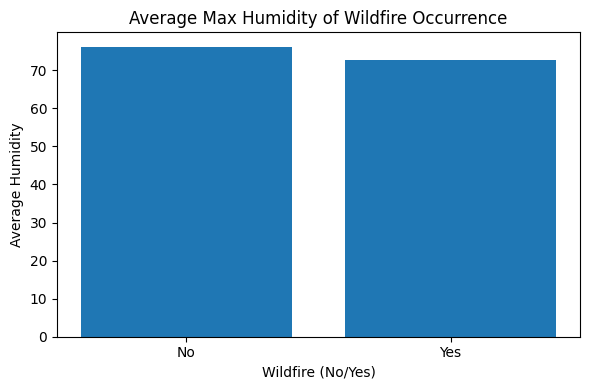

In [30]:
maxhum = wfdf3.groupby('Wildfire')['Max Humidity'].mean()
plt.figure(figsize=(6,4))
plt.bar(maxhum.index, maxhum.values)
plt.title('Average Max Humidity of Wildfire Occurrence')
plt.xlabel('Wildfire (No/Yes)')
plt.ylabel('Average Humidity')
plt.tight_layout()
plt.show()

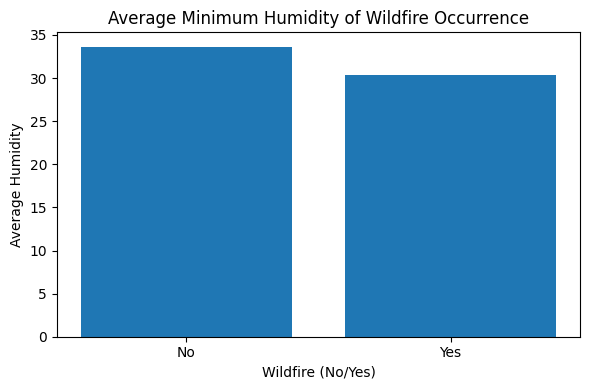

In [31]:
minhum = wfdf3.groupby('Wildfire')['Minimum Humidity'].mean()
plt.figure(figsize=(6,4))
plt.bar(minhum.index, minhum.values)
plt.title('Average Minimum Humidity of Wildfire Occurrence')
plt.xlabel('Wildfire (No/Yes)')
plt.ylabel('Average Humidity')
plt.tight_layout()
plt.show()

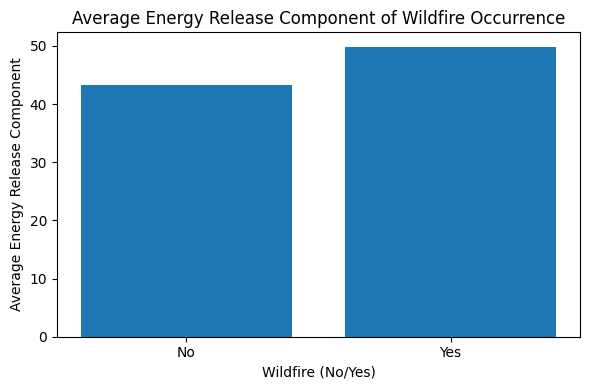

In [34]:
erc = wfdf3.groupby('Wildfire')['Energy Release Component'].mean()
plt.figure(figsize=(6,4))
plt.bar(erc.index, erc.values)
plt.title('Average Energy Release Component of Wildfire Occurrence')
plt.xlabel('Wildfire (No/Yes)')
plt.ylabel('Average Energy Release Component')
plt.tight_layout()
plt.show()

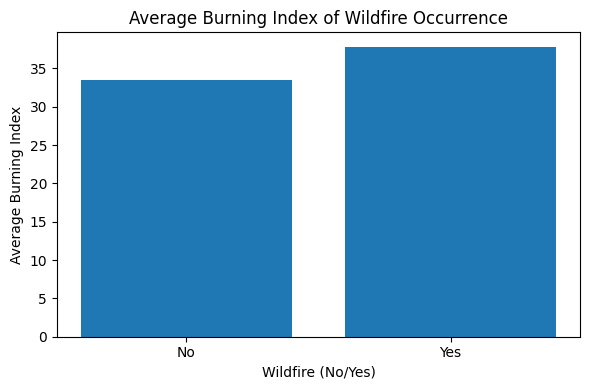

In [32]:
bi = wfdf3.groupby('Wildfire')['Burning Index'].mean()
plt.figure(figsize=(6,4))
plt.bar(bi.index, bi.values)
plt.title('Average Burning Index of Wildfire Occurrence')
plt.xlabel('Wildfire (No/Yes)')
plt.ylabel('Average Burning Index')
plt.tight_layout()
plt.show()

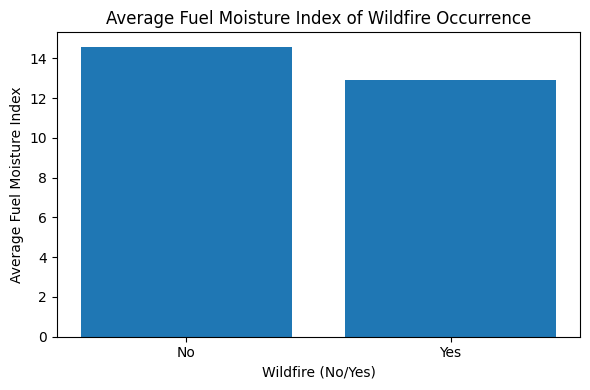

In [33]:
fmi = wfdf3.groupby('Wildfire')['Fuel Moisture Index'].mean()
plt.figure(figsize=(6,4))
plt.bar(fmi.index, fmi.values)
plt.title('Average Fuel Moisture Index of Wildfire Occurrence')
plt.xlabel('Wildfire (No/Yes)')
plt.ylabel('Average Fuel Moisture Index')
plt.tight_layout()
plt.show()